# Predicting insurance cost(Regression problem)

- We have a dataset ie "datasets_13720_18513_insurance(1).csv" which is based on insurance cost we will have to predict the   insurance cost here.
- It's a regression problem so we will have to use regression models like "LinearRegression","RandomForestRegressor" etc.


## importing necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


## Loading the dataset

In [3]:
data = pd.read_csv("datasets_13720_18513_insurance(1).csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic checks

In [22]:
data.shape

(1338, 7)

In [23]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Normality check

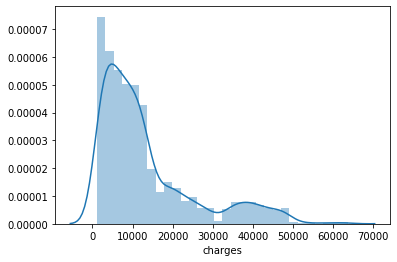

In [24]:
%matplotlib inline
sb.distplot(data.charges)

In [25]:
print("skewness of charges :",stats.skew(data.charges))
print("kurtosis of charges :",stats.kurtosis(data.charges))

skewness of charges : 1.5141797118745743
kurtosis of charges : 1.595821363956751


## Define X,y

In [26]:
X = data.iloc[:,:-1]
y = data.charges

In [27]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [29]:
enc = LabelEncoder()
X.sex= enc.fit_transform(X.sex)
X.smoker = enc.fit_transform(X.smoker)
X.region = enc.fit_transform(X.region)

## Spliting the data

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.15,random_state =10)

In [31]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1137, 6)
X_test shape: (201, 6)
y_train shape: (1137,)
y_test shape: (201,)


## Defining the model ,training it 

## Using LinearRegression 

In [32]:
model_insurance = LinearRegression()
model_insurance.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Checking the range of accuracy by using cross_val_score

In [33]:
a = cross_val_score(model_insurance,X,y)

In [34]:
print(a)

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]


In [35]:
b = cross_val_score(model_insurance,X,y,cv=5)

In [36]:
y_predict= model_insurance.predict(X_test)

In [37]:
r2_score(y_test,y_predict)

0.6827034881260194

So here if we find the accuracy then we will get the accuracy range is very less so we will have to channge the algotithm.


## Using RandomForestRegressor algorithm

In [38]:
from sklearn.ensemble import RandomForestRegressor


## Defining randomforest model,training it and predicting the insurance cost

In [39]:
model_insurance_rfr = RandomForestRegressor(max_depth=10,n_estimators=100,random_state=10)
model_insurance_rfr.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [40]:
y_predict_rfr = model_insurance_rfr.predict(X_test)

In [41]:
r2_score(y_test,y_predict_rfr)

0.7973721012097956

## Checking the accuracy range for randomforest model by using cross_val_score

In [42]:
c = cross_val_score(model_insurance_rfr,X,y,cv=10)

In [43]:
c

array([0.86979017, 0.83850127, 0.82251862, 0.73826422, 0.85917353,
       0.89487166, 0.85529912, 0.78571459, 0.8419946 , 0.86925067])

## Hyper parametre tuning by using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameter= {
            'n_estimators':[10],
            'max_depth':[3,4,5],
            "max_samples" : [200,300,400],
            "min_samples_split": [5,10,20,30]}

In [46]:
grid = GridSearchCV(model_insurance_rfr,parameter,scoring="r2",verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=10, n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=20, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=20, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_samples=200, min_samples_split=20, n_estimators=10 
[CV]  max_depth=3, max_samples=200, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] max_depth=3, max

[CV]  max_depth=3, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=4, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=200, min_samples_split=10, n_estimators=10 
[CV]  max_depth=4, max_samples=2

[CV]  max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=4, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_samples=200, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=200, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_sa

[CV]  max_depth=5, max_samples=400, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=400, min_samples_split=20, n_estimators=10 
[CV]  max_depth=5, max_samples=400, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_samples=400, min_samples_split=30, n_estimators=10 
[CV]  max_depth=5, max

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=10,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [47]:
grid.best_params_

{'max_depth': 4,
 'max_samples': 400,
 'min_samples_split': 5,
 'n_estimators': 10}

In [48]:
grid.best_score_

0.8653278325896185

## Recreating model with best parametres from GridSearch_CV

In [50]:
model_3 = RandomForestRegressor(max_depth=5,max_samples=200,min_samples_split=5,n_estimators=70,random_state=10)
model_3.fit(X_train,y_train)
y_predict=model_3.predict(X_test)
r2_score(y_test,y_predict)

0.8165254838331468

As the accuracy of our model is 86% now ,RandomForestRegressor is the ideal model for this datasets.

In [1]:
pwd

'C:\\Users\\Asus\\datamites capstone projects'